## README File for ``Differential_Equation_Solver.py``

## Imports

* ``numpy`` is a python package that allows for quick and easy computing using multi-dimensional arrays. 

## Constants

* The following constants are all part of the Cash-Karp routine:
    * ``a2``: $a_2 = 1/5$
    * ``a3``: $a_3 = 3/10$
    * ``a4``: $a_4 = 3/5$
    * ``a5``: $a_5 = 1$
    * ``a6``: $a_6 = 7/8$
    * ``b21``: $b_{21} = 1/5$
    * ``b31``: $b_{31} = 3/40$
    * ``b32``: $b_{32} = 9/40$
    * ``b41``: $b_{41} = 3/10$
    * ``b42``: $b_{42} = -9/10$
    * ``b43``: $b_{43} = 6/5$
    * ``b51``: $b_{51} = -11/54$
    * ``b52``: $b_{52} = 5/2$
    * ``b53``: $b_{53} = -70/27$
    * ``b54``: $b_{54} = 35/27$
    * ``b61``: $b_{61} = 1631/55296$
    * ``b62``: $b_{62} = 175/512$
    * ``b63``: $b_{63} = 575/13824$
    * ``b64``: $b_{64} = 44275/110592$
    * ``b65``: $b_{65} = 253/4096$
    * ``c1``: $c_1 = 37/378$
    * ``c2``: $c_2 = 0$
    * ``c3``: $c_3 = 250/621$
    * ``c4``: $c_4 = 125/594$
    * ``c5``: $c_5 = 0$
    * ``c6``: $c_6 = 512/1771$
    * ``c10``: $c^*_1 = 2825/27648$
    * ``c20``: $c^*_2 = 0$
    * ``c30``: $c^*_3 = 18575/48384$
    * ``c40``: $c^*_4 = 13525/55296$
    * ``c50``: $c^*_5 = 277/14336$
    * ``c60``: $c^*_6 = 1/4$

* Other constants:
    * ``eps``: Used to find an ideal delta at each step, which is this fraction of y, $\epsilon = 10^{-8}$ 
    * ``S``: Safety value, $S = 0.9$

## Functions

### ``Cash_Karp``
This function calculates the fourth-order Runge-Kutta formula and fifth-order Runge-Kutta formula with Cash-Karp parameters.
* **Inputs**
    * ``x``: The current value of the independent variable of the differential equations. In most of our code, this is scale factor, $a$. 
    * ``y``: An array of the current values of dependent variables of the differential equations. In most of our code, ``y[-1]`` is time, ``y[-2]`` is temperature, ``y[-3]`` is Q, and the rest of the ``y`` values are occupation fractions. 
    * ``der``: The function that outputs the derivative of each y function when given the current ``x`` and ``y`` values.
    * ``dx``: The current step size, often referred to as $h$ in mathematical texts.
* **Calculations**
    * ``k1``: $k_1 = h y'(x,y)$
    * ``k2``: $k_2 = h y'(x+a_2h,y+b_{21}k_1)$
    * ``k3``: $k_3 = h y'(x+a_3h,y+b_{31}k_1+b_{32}k_2)$
    * ``k4``: $k_4 = h y'(x+a_4h,y+b_{41}k_1+b_{42}k_2+b_{43}k_3)$
    * ``k5``: $k_5 = h y'(x+a_5h,y+b_{51}k_1+b_{52}k_2+b_{53}k_3+b_{54}k_4)$
    * ``k6``: $k_6 = h y'(x+a_6h,y+b_{61}k_1+b_{62}k_2+b_{63}k_3+b_{64}k_4+b_{65}k_5)$
* **Outputs**
    * ``y5th``: The fifth-order approximation of the $y$ value that corresponds to $x+h$, $y_{n+1} = y_n + c_1k_1 + c_2k_2 + c_3k_3 + c_4k_4 + c_5k_5 + c_6k_6 + \mathcal{O}(h^6)$
    * ``y4th``: The fourth-order approximation of the $y$ value that corresponds to $x+h$, $y^*_{n+1} = y_n + c^*_1k_1 + c^*_2k_2 + c^*_3k_3 + c^*_4k_4 + c^*_5k_5 + c^*_6k_6 + \mathcal{O}(h^5)$
    * ``dx``: just returns ``dx`` as it is sent to the function... not sure why it is returned?
    
### ``evaluate_delta``
This function is called by ``driver`` to check if the most recent calculation by ``Cash_Karp`` used an acceptable step size.
* **Inputs**
    * ``y``: The current array of $y$ values, where ``y5`` and ``y4`` represent an approximation for the *next* step
    * ``y5``: The fifth-order approximation of the $y$ values that correspond to $x+dx$
    * ``y4``: The fourth-order approximation of the $y$ values that correspond to $x+dx$
* **Calculations**
    * ``delta_array``: An array of the differences between ``y5`` and ``y4``.
    * ``delta``: The maximum difference between any two corresponding values in ``y5`` and ``y4``.
    * ``delta_ideal``: Unrelated to ``delta_array`` and ``delta``, this is an array of all the *ideal* deltas, $\Delta_{\rm ideal} = \epsilon *(|y| + \frac{1}{2}|y_5-y| + \frac{1}{2}|y_4-y|) $. However, we were having problems when one of the values in ``delta_ideal`` ended up being zero, so we added an if statement to account for this possibility, in which case we add $\epsilon 10^{-15}$ to all the $\Delta_{\rm ideal}$ values.
    * ``nz``: To avoid dividing by zero in ``d_rat``, we find which indices of ``delta_array`` are non-zero, and store the array of these indices in ``nz``.
    * ``d_rat``: The ratio of ``delta_ideal[nz]/delta_array[nz]``. 
    * ``d``: The smallest value in ``d_rat``. It turns out that we really want all of our deltas to be smaller than those in ``delta_ideal``. So, if the smallest value in ``d_rat`` is greater than one, then all of ``d_rat`` is greater than one and thus all of ``delta_array[nz] < delta_ideal[nz]``. If ``d`` is less than one, however, then at least one of the values in ``delta_array[nz]`` is greater than its corresponding value in ``delta_ideal[nz]``, and the deltas should be recalculated.
* **Outputs**
    * "good" or "bad": The string "good" is returned if either ``d``>1, or ``delta`` is 0, implying that all of ``delta_array`` is 0. The string "bad" is returned if ``d``<1.
    * ``delta`` or ``d``: The only case in which ``delta`` is returned is if ``delta`` = 0, and thus all of ``delta_array`` is 0. Otherwise, ``d`` is returned, whether it is greater or less than one.
    
### ``driver``
This function goes through a for loop 10 times to try and find the best current step to take, take that step, and then suggest a step size for the next step that will be taken.
* **Inputs**
    * ``x``: Current $x$ value
    * ``y``: Current array of $y$ values
    * ``der``: Function that calculates and returns the derivatives of all the dependent variables given the current $x$ and $y$ values.
    * ``dx``: Current step size
* **Calculations**
    * ``y5``: The fifth-order approximation of the $y$ values that correspond to $x+dx$
    * ``y4``: The fourth-order approximation of the $y$ values that correspond to $x+dx$
    * ``gb``: Stands for "good or bad", will either be a string "good" or "bad" from ``evaluate_delta``, depending on if ``evaluate_delta`` determined if the step taken by ``Cash_Karp`` was good or bad. If ``gb`` is "good", we know we're going to keep the most recent step taken by ``Cash_Karp`` and break out of the for loop. If ``gb`` is "bad", we set a new ``dx`` and ``dx_new``, and continue in the for loop with the new suggested step-size. 
    * ``d``: In this function, it only matters if ``d`` is zero or not. If it is, then ``dx_new`` is set to 5``dx``, as this past step size didn't have to be so small since ``d`` being zero means the fifth-order and fourth-order approximations of  the next step were equivalent for *all* $y$ values. If it is not zero, we will take a bit more care when deciding ``dx_new``.
    * ``dx``: ``dx`` is only recalculated if ``gb`` is "bad", that is, if the original suggested step size was determined to not be acceptable. If it is reset, it is set to $S dx |d|^{0.25}$. It is not reset if we get through the last iteration of the for loop without ``gb`` ever being "good", however, as the output ``x`` need to be able to use the ``dx`` most recently used in ``Cash_Karp`` to accurately return the next step.
    * ``dx_new``: There are three points at which ``dx_new`` can be calculated. It is set to 5``dx`` if ``d`` is 0. It is set to the minimum of 5``dx`` and $S dx |d|^{0.2}$ if ``gb`` is "good" but ``d`` is not zero. Finally, if we run through all 10 runs of the for loop without ``gb`` ever being "good", ``dx_new`` is simply set to $S dx |d|^{0.25}$ to ensure that we have something to return when we return ``dx_new``.
* **Outputs**
    * ``x``: The starting point of the next step to be taken, that is, $x_{\rm new} = x_{\rm old} + dx$ where $x_{\rm new}$ is what is returned by this function, $x_{\rm old}$ is what was sent to this function, and $dx$ is the step size that was ultimately used in ``Cash_Karp`` to determine the ``y5`` that will be returned. This $x$ value was either determined to have an acceptable step size, or the for loop simply ran 10 times without arriving at an acceptable step size and the final calculation yielded ``x`` as the next step.
    * ``y5``: An array of the final and most accurate calculation of the next $y$ values that correspond to the returned ``x``. 
    * ``dx_new``: The suggested next step size.
    
### ``destination_x_dx``
This function is what is actually called by another module or program to solve a given set of differential equations. Note that if ``xf`` is not reached in the output, it is likely that ``N`` was simply too small and should be made larger to accommodate for the number of steps necessary to solve the ODE. 
* **Inputs**
    * ``der``: Function that calculates and returns the derivatives of all the dependent variables given the current $x$ and $y$ values.
    * ``y_in``: Array of initial y-values (dependent variables).
    * ``N``: the number of steps that will be saved
    * ``dN``: The number of steps taken between the steps that are saved. So, our results will have the accuracy of $N * dN$ steps, but with only $N$ data points so there isn't as much data to save and process later.
    * ``xi``: Initial $x$ value
    * ``xf``: Final $x$ value, if this value is reached before $N$ stpes have been taken, the for loop will break and return the results immediately
    * ``dx_init``: Initial step size
* **Calculations**
    * ``dx``: Begins as ``dx_init``, but is reset to the output from ``driver`` every time ``driver`` is called, as this function calculates the best new step size
    * ``y5th``: Initially set to a copy of ``y_in`` (to ensure ``y5th`` and ``y_in`` aren't linked as ``y5th`` is going to change a lot), but then reset to the output from ``driver`` every time ``driver`` is called to be the most recent array of y values
    * ``xi``: Serves the dual purpose of acting as the initial $x$ value and acting as the placeholding $x$ value in the for loop as we step through the ODE solver. 
    * ``x_values``: Initially set to an array of zeros of length $N+1$ (since $N$ steps technically means $N$ spaces between saved values so a total of $N+1$ saved values, but this doesn't really matter) where ``x_values[0]`` is set to ``xi``, the initial x value. With each iteration of the main for loop, the next x value (``x_values[i]``) is set to be the most recent calculation of $x$, which is the placeholder for $x$, ``xi``.
    * ``y``: Initially set as a zero matrix of size ``len(x_values)`` by ``len(y_in)``. The initial array is set to be ``y5th``, which is a cope of ``y_in`` at this point. In the main for loop, the current array of ``y`` is set to be ``y5th``, the most recent output from ``driver`` of the current $y$ values.
* **Outputs**
    * ``x_values`` or ``x_values[:(i+1)]``: If the main for loop gets to ``i`` = ``N``, then the now full ``x_values`` array is returned as is. If the main for loop doesn't get to that point, that means that ``xi`` became greater than the maximum $x$ value ``xf`` and thus broke out of the for loop. In this case, all of the ``x_values`` array that got used (through the last index calculated, ``x_values[:i+1]``) is returned.
    * ``y`` or ``result``: If the main for loop gets to ``i`` = ``N``, then the now full ``y`` matrix is returned as is. If the main for loop doesn't get to that point, that means that ``xi`` became greater than the maximum $x$ value ``xf`` and thus broke out of the for loop. In this case, a new matrix ``result`` is calculated and returned, in which each dependent variable $y$ array is truncated to not include the zeros at the end that were never filled.
    * ``dx``: The final step size used. This is mostly returned in case we wish to continue ODE solving past this point and put the returned values back into this function to solve some more.


### An example of ``destination_x_dx`` in use is provided to help the reader practice using the code.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import Differential_Equation_Solver as DES

In [2]:
def der(x,y):
    out = np.zeros(len(y))
    out[0] = y[1]
    out[1] = y[2]
    out[2] = y[3]
    out[3] = y[0]
    return out

y_try = np.array([0,1,0,-1])
x, y, dx = DES.destination_x_dx(der, y_try, 100, 1, 0, 10, 0.0001)

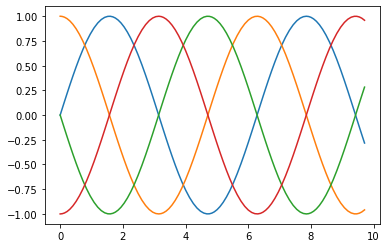

In [3]:
plt.figure()
plt.plot(x,y[0])
plt.plot(x,y[1])
plt.plot(x,y[2])
plt.plot(x,y[3])
plt.show()